# Lead Scoring Case Study

-- Submitted By: Hitesh Mehta, Mohammed Mirza Ahmed, M Meghana

The analysis is divided into following:

1. Data understanding
2. Data cleaning (cleaning missing values, removing redundant columns etc.)
3. Data Analysis
4. Data Preparation
5. Model Building
6. Making Predictions
7. Model Evaluation
8. Finding the Optimal Cutoff
9. Precision and recall tradeoff
10. Conclusion

In [2]:
#imporitng the required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#supress warnings
import warnings
warnings.filterwarnings("ignore")

# Sklearn libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [3]:
#Load Dataset
df_leads = pd.read_csv("Leads.csv")

# Understanding The Data

In [4]:
#Looking at first few rows of data

df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
#Looking at shape of dataset

df_leads.shape

(9240, 37)

There are 37 columns in the dataframe. These columns would be analyzed to find the lead score and impact on conversion rate

In [6]:
#Looking at Columns of data

df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
#checking the details of numerical data

df_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Data Cleaning

In [8]:
#Let us look at columns having null values

df_leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

There are few columns with quite a high number of null values in the dataframe.

In [9]:
# Converting all the values to lower case
df_leads = df_leads.applymap(lambda s : s.lower() if type(s) == str else s)

In [10]:
# Replacing 'Select' with NaN (Since it means no option is selected)
df_leads = df_leads.replace('select', np.nan)

As there are a lot of columns which have high number of missing values. Clearly, these columns are not useful. Since, there are 9000 datapoints in our dataframe, let's eliminate the columns having greater than 3000 missing values as they are of no use to us.

In [11]:
for col in df_leads.columns:
    if df_leads[col].isnull().sum() > 3000:
        df_leads.drop(col, 1, inplace = True)

In [13]:
# Check the number of null values again

df_leads.isnull().sum()

Prospect ID                                        0
Lead Number                                        0
Lead Origin                                        0
Lead Source                                       36
Do Not Email                                       0
Do Not Call                                        0
Converted                                          0
TotalVisits                                      137
Total Time Spent on Website                        0
Page Views Per Visit                             137
Last Activity                                    103
Country                                            0
What is your current occupation                    0
What matters most to you in choosing a course      0
Search                                             0
Magazine                                           0
Newspaper Article                                  0
X Education Forums                                 0
Newspaper                                     

There is a huge value of null variables in 4 columns as seen above. But removing the rows with the null value will result in lot of data loss and they are important columns. So, instead we are going to replace the NaN values with 'not provided'.

In [12]:
df_leads['What matters most to you in choosing a course'] = df_leads['What matters most to you in choosing a course'].fillna('not provided')
df_leads['Country'] = df_leads['Country'].fillna('not provided')
df_leads['What is your current occupation'] = df_leads['What is your current occupation'].fillna('not provided')
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [14]:
# Checking if there are columns with one unique value since it won't affect our analysis
df_leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            39
What is your current occupation                     7
What matters most to you in choosing a course       4
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [15]:
# Dropping unique valued columns
df_leads.drop(['Magazine', 'Receive More Updates About Our Courses', 'I agree to pay the amount through cheque', 'Get updates on DM Content', 'Update me on Supply Chain Content'], axis = 1, inplace = True)

In [15]:
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified


In [16]:
# checking values in country column
df_leads["Country"].value_counts()

india                   6492
not provided            2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switzerland   

As maximum leads are from India and any other country has less than 1% we will replace other countries with óutside india

In [17]:
def replaceCountry (x):
    category = ""
    
    if x == "india":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
        
    return category

df_leads['Country'] = df_leads.apply(lambda x : replaceCountry(x['Country']), axis = 1)

df_leads['Country'].value_counts()


india            6492
not provided     2461
outside india     287
Name: Country, dtype: int64

In [18]:
#dropping columns 'Prospect ID', 'Lead Number', 'Last Notable Activity' as they will not add value to the model

df_leads.drop(['Prospect ID','Lead Number','Last Notable Activity'], axis = 1, inplace = True)

df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        9240 

In [19]:
# Checking shape of the data frame
df_leads.shape

(9240, 19)

In [20]:
# Removing rows with NaN values

df_leads = df_leads[df_leads.isnull().sum(axis = 1) < 1]

# Checking shape of the data frame
df_leads.shape

(9074, 19)

Only 1.8% of the data is lost. Thus we are OK

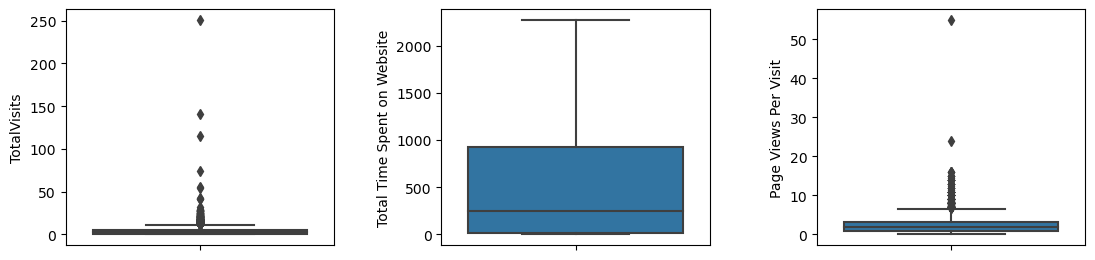

In [21]:
#handling outliers

# Draw box plots for indepent variables with continuous values
cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
plt.figure(figsize = (18, 4))
plt.subplots_adjust(top = 0.6, bottom=0.01, hspace=1, wspace=0.4)

i = 1
for col in cols:
    plt.subplot(1, 4, i)
    sns.boxplot(y = col, data = df_leads)
    i += 1

As we can see column: 'Total Visits' and 'Page Views Per Visit' both have outliers. 

In [22]:
#Treating the outliers

def Refine_Outlier(df, columnList):
    
    for i in columnList:
        q1 = df[i].describe()["25%"]
        q3 = df[i].describe()["75%"]
        IQR = q3 - q1

        upper_bound = q3 + 1.5 * IQR
        lower_bound = q1 - 1.5 * IQR

        # capping upper_bound
        df[i] = np.where(df[i] > upper_bound, upper_bound, df[i])

        # flooring lower_bound
        df[i] = np.where(df[i] < lower_bound, lower_bound, df[i])
        
# Columns having outliers
capping_cols = ["TotalVisits","Page Views Per Visit"]
 
Refine_Outlier(df_leads, capping_cols)

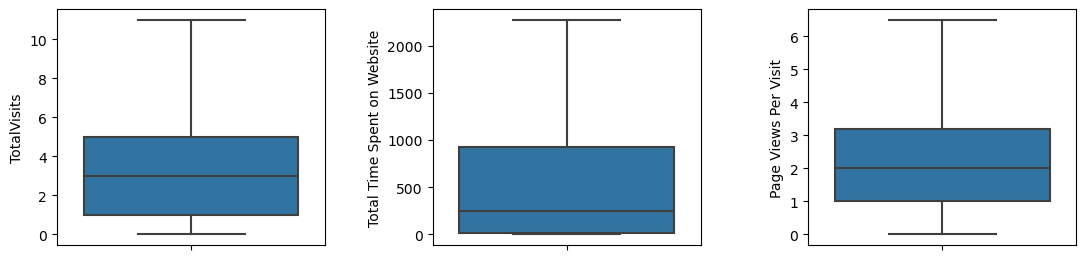

In [23]:
# Draw box plots for indepent variables with continuous values after outlier treatment

cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
plt.figure(figsize = (18, 4))
plt.subplots_adjust(top = 0.6, bottom=0.01, hspace=1, wspace=0.4)

i = 1
for col in cols:
    plt.subplot(1, 4, i)
    sns.boxplot(y = col, data = df_leads)
    i += 1

# Data Analysis - Univariate Analysis

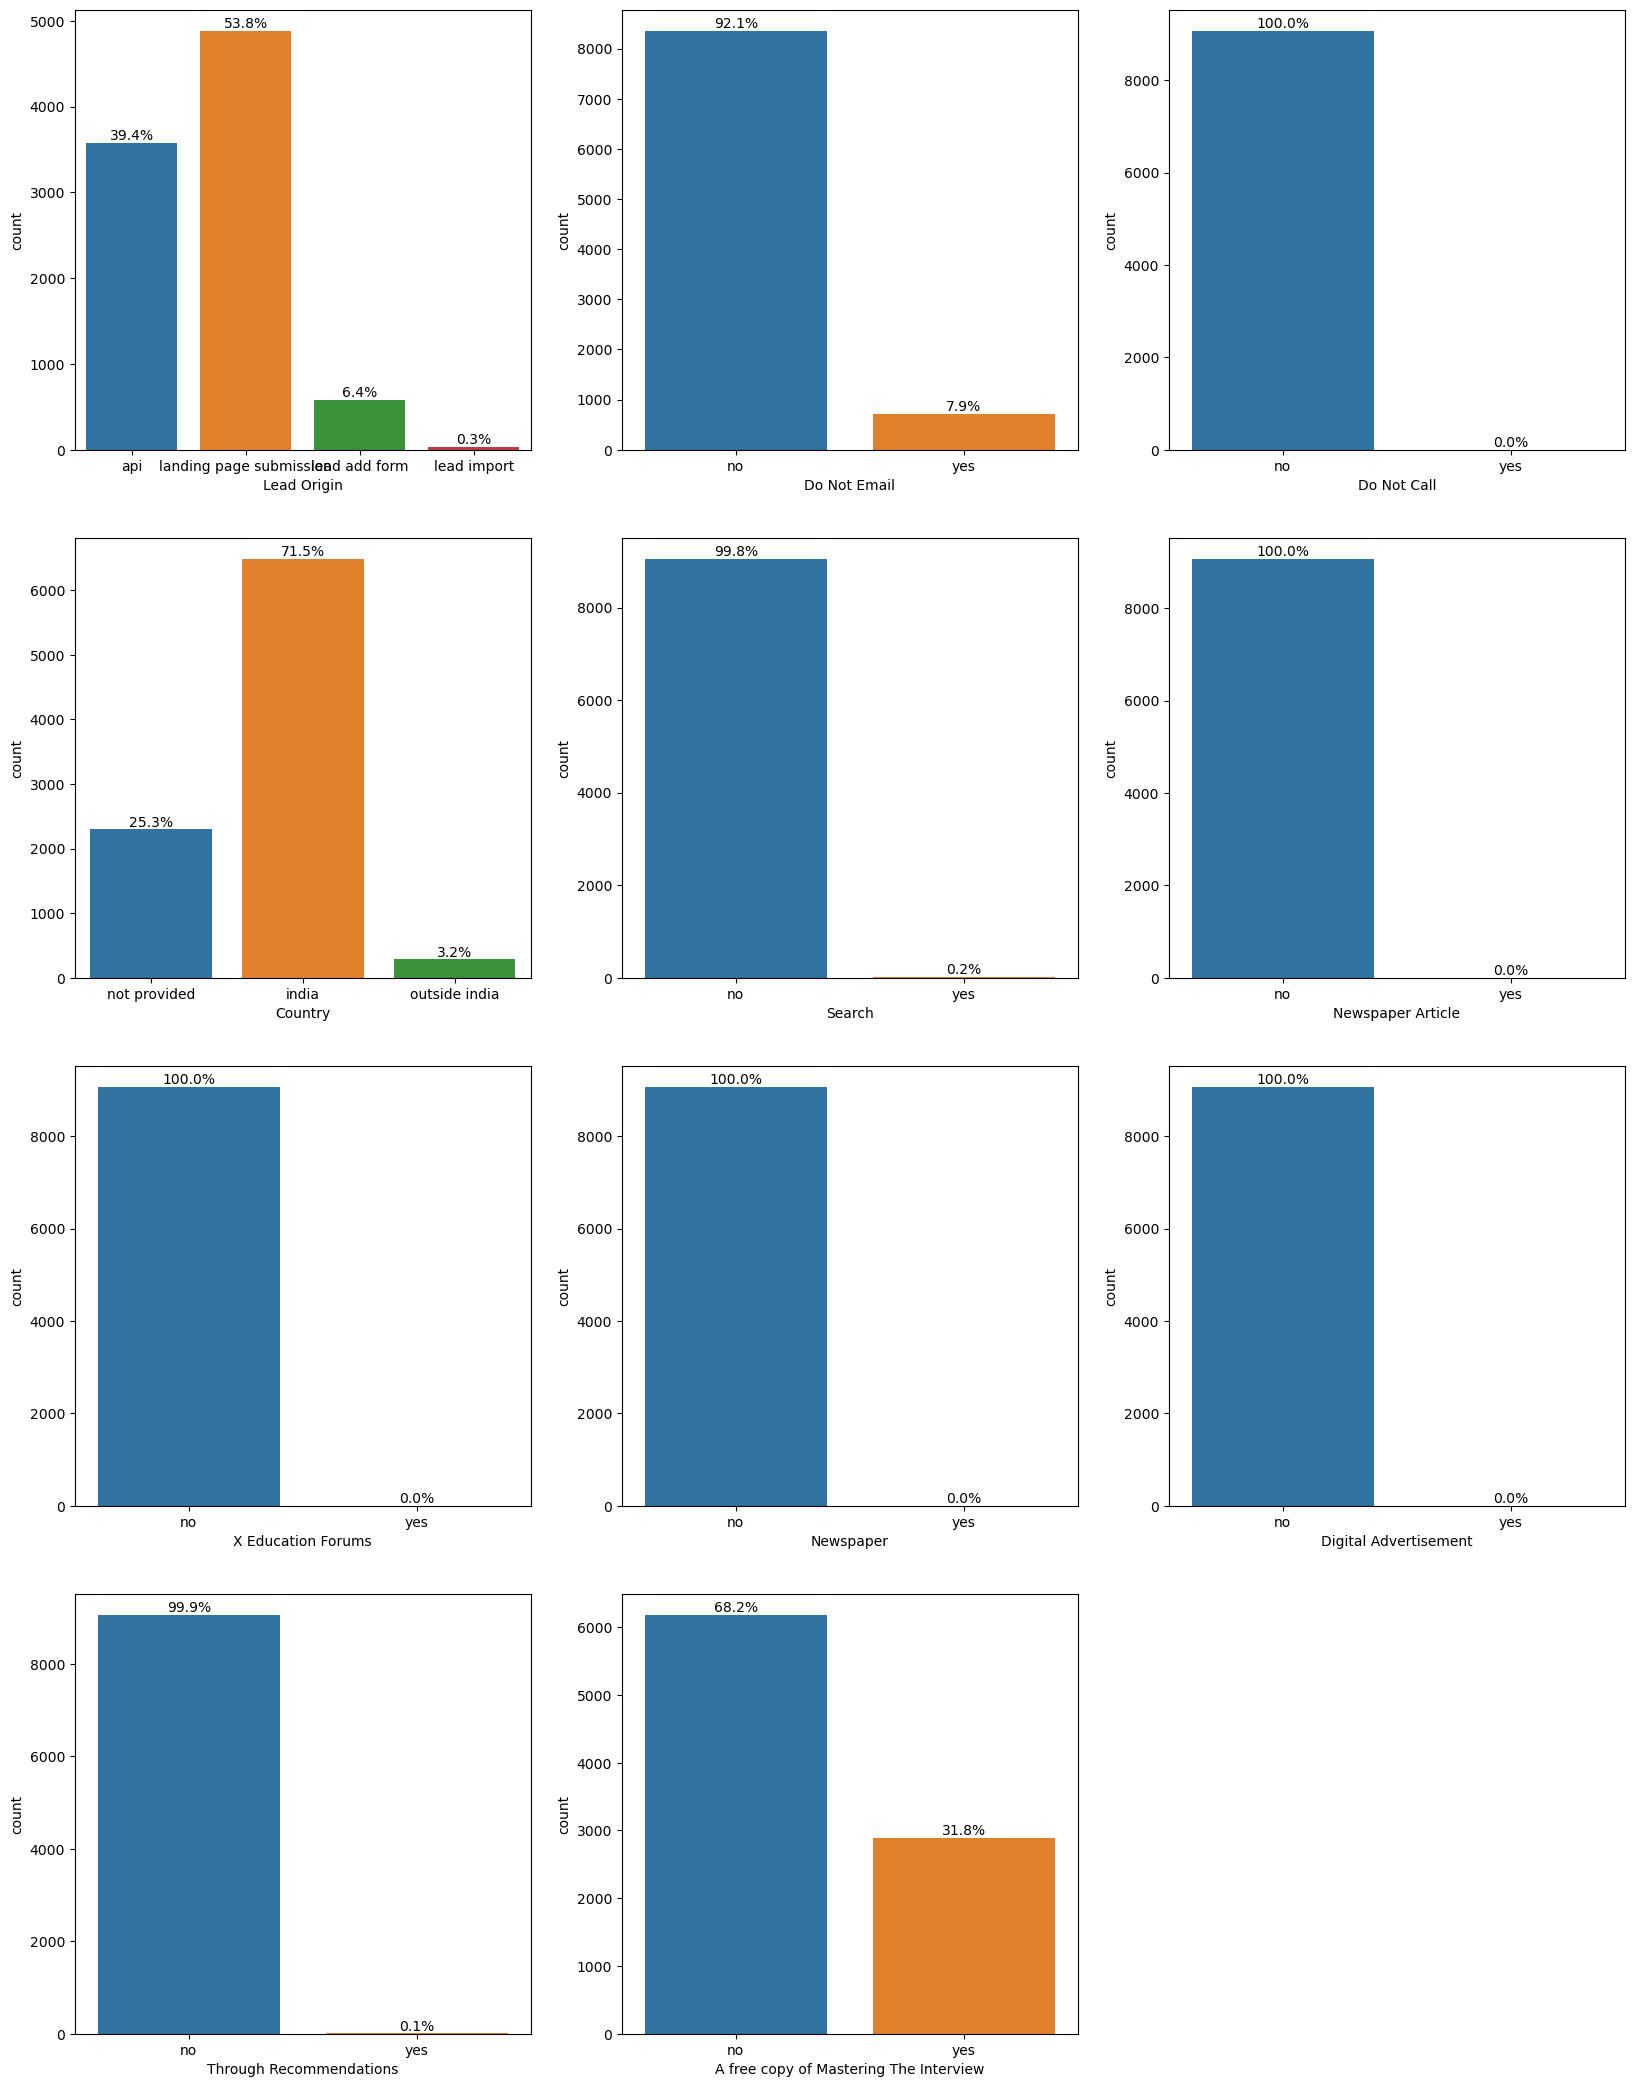

In [24]:
# Analysing Categorical Variabels 

# Bar graph for categorical variables
vars_cat = ['Lead Origin', 'Do Not Email', 'Do Not Call', 'Country', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']

plt.figure(figsize = (20, 40))

for i in enumerate(vars_cat):
    plt.subplot(6, 3, i[0] + 1)    
    ax = sns.countplot(data = df_leads, x = i[1])
    total = df_leads.shape[0]
    
    for p in ax.patches:
        text = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        
        ax.annotate(text, (x, y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    
plt.show()

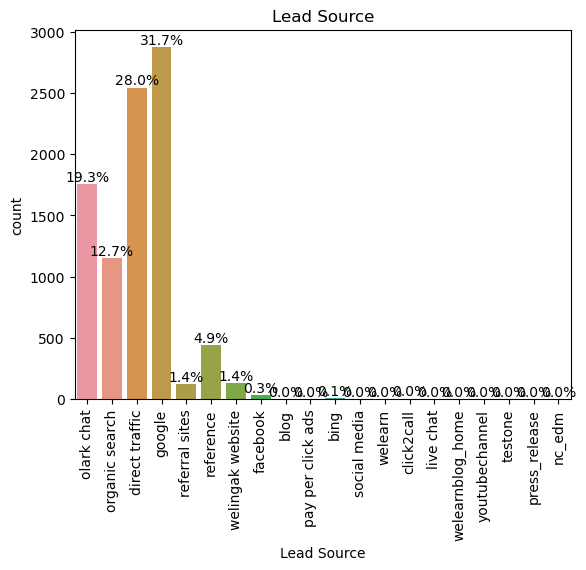

In [25]:
# plot for lead source

ax = sns.countplot(data = df_leads, x = 'Lead Source')
plt.xticks(rotation = 90)
total = df_leads.shape[0]

for p in ax.patches:
        text = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        
        ax.annotate(text, (x, y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    
        
plt.title('Lead Source')
plt.show()

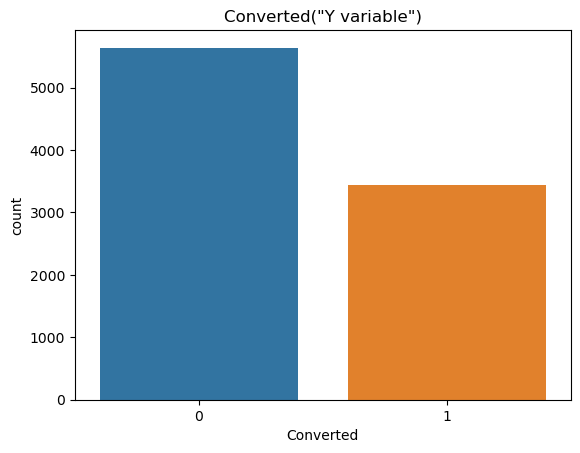

In [26]:
# plot for Converted
sns.countplot(data = df_leads, x = 'Converted')
plt.title('Converted("Y variable")')
plt.show()

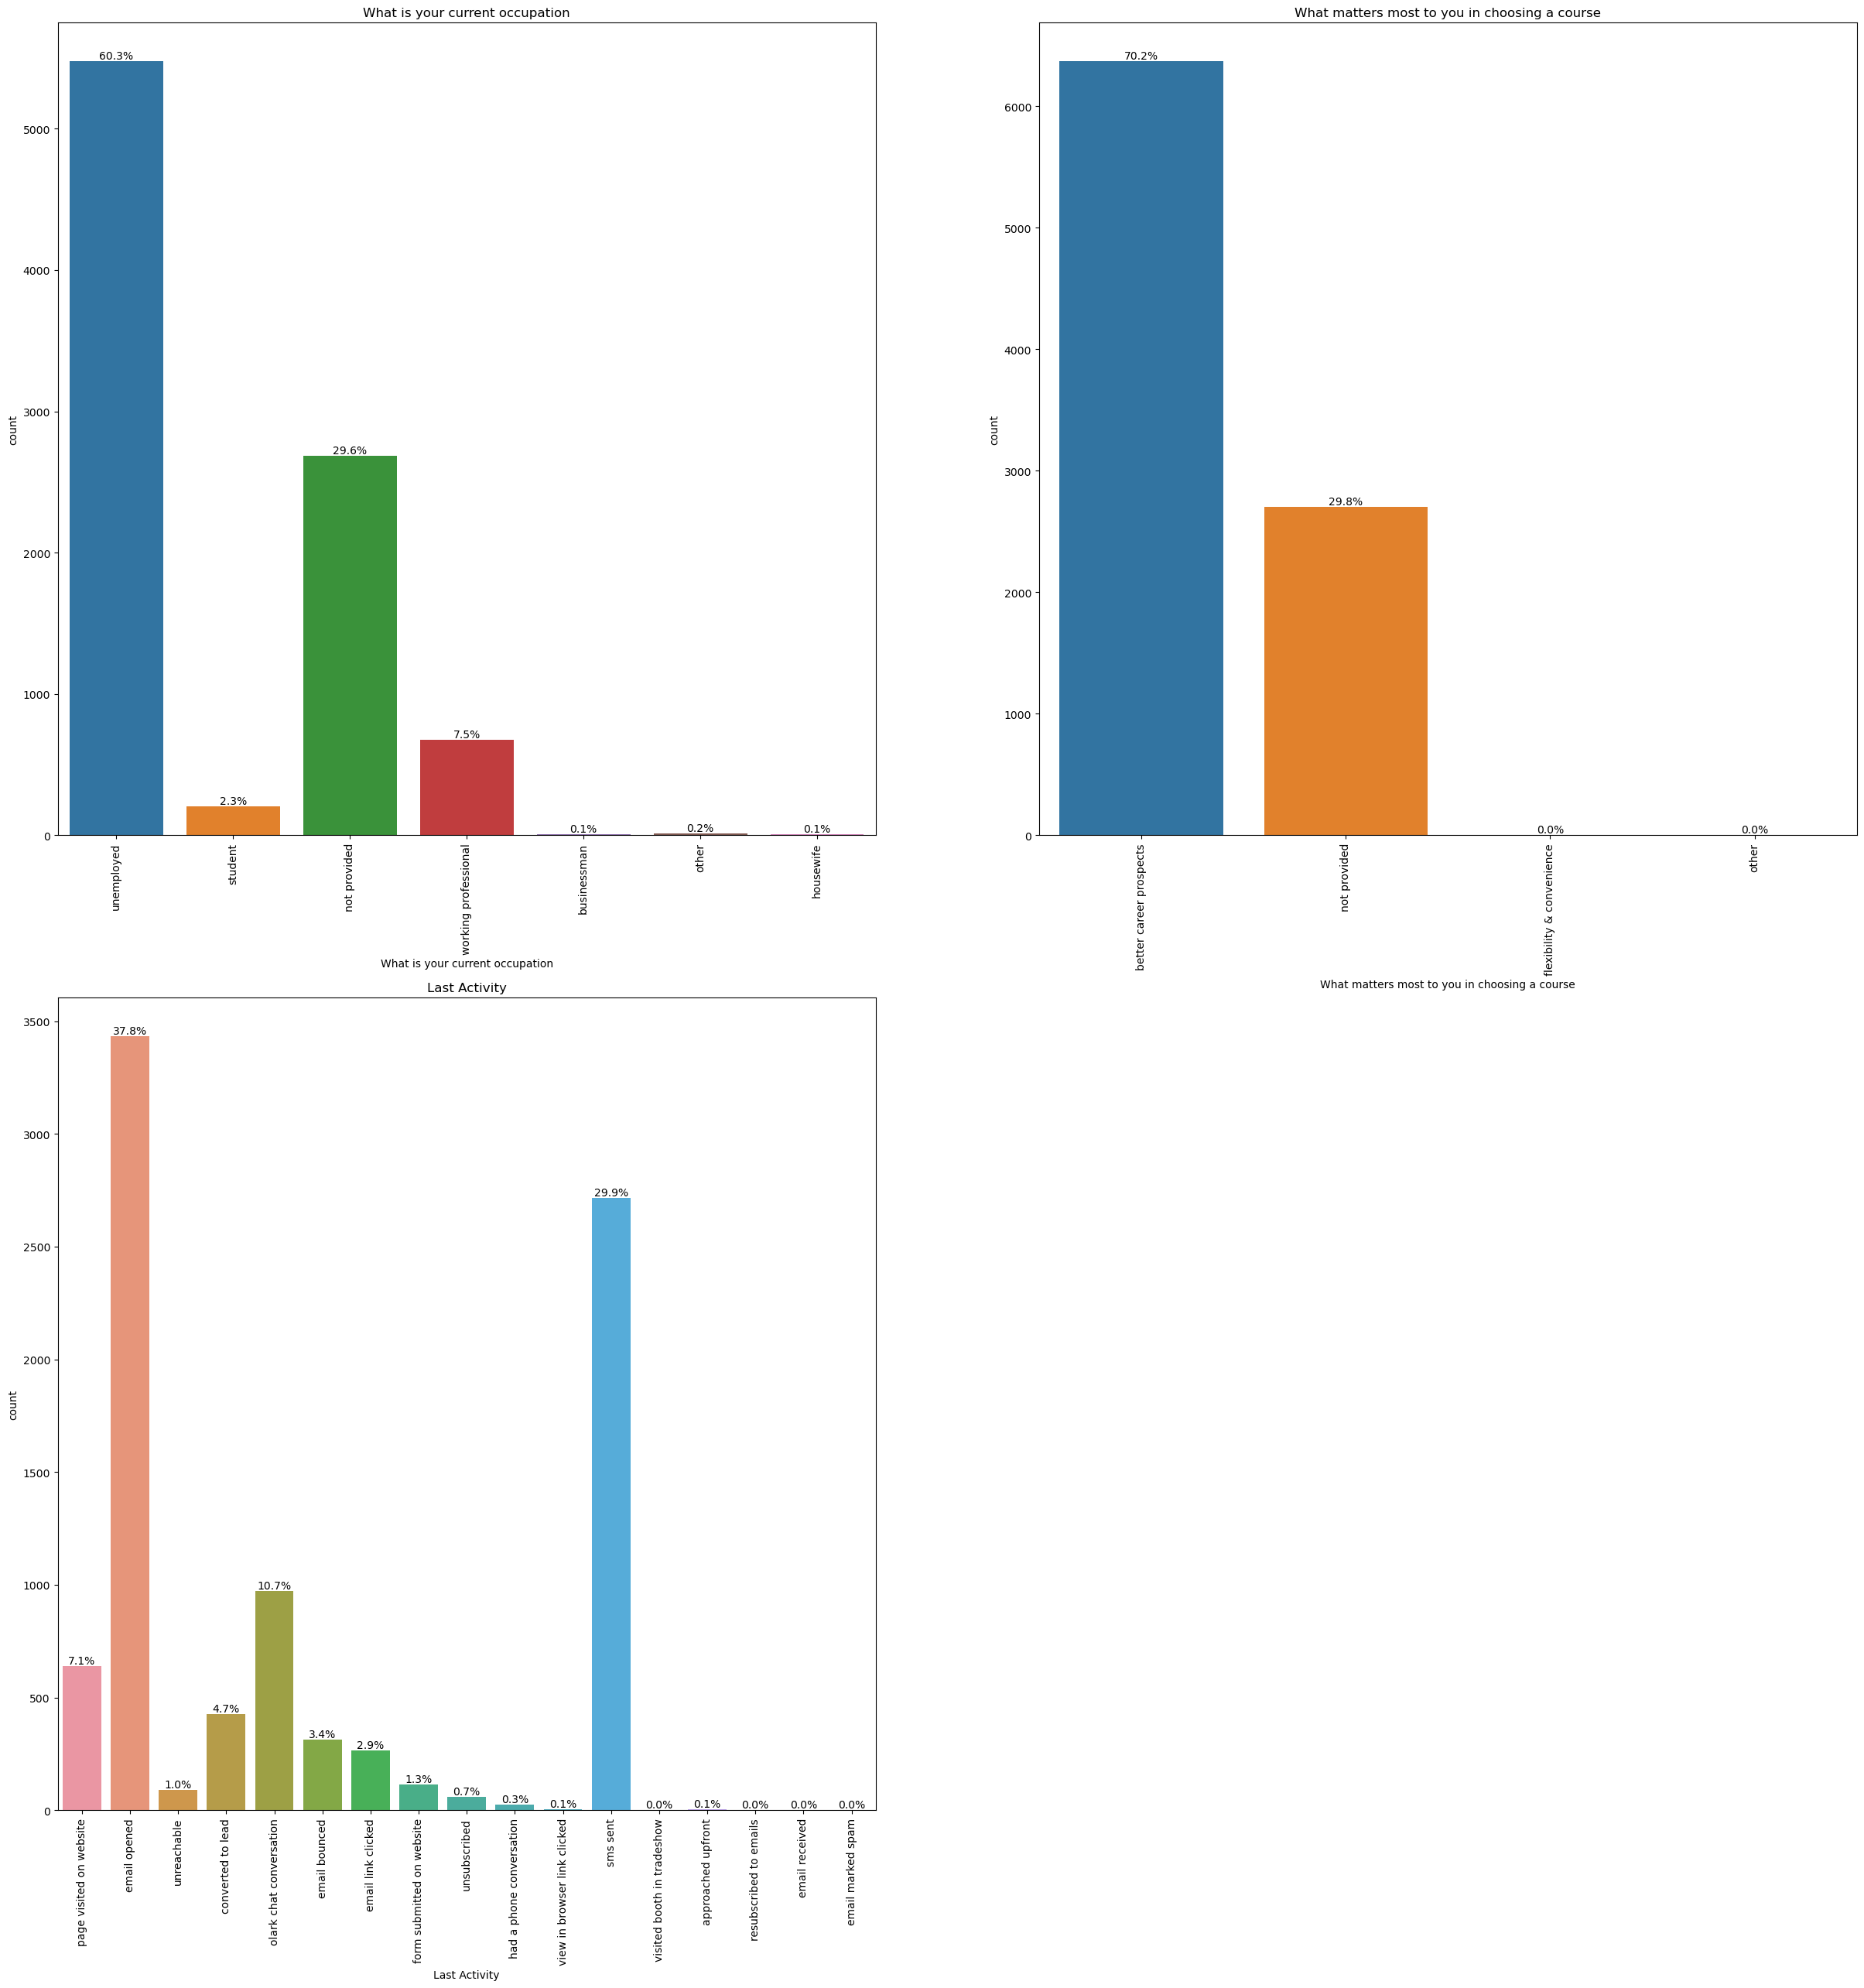

In [27]:
vars_cat = ['What is your current occupation', 'What matters most to you in choosing a course', 'Last Activity']

plt.figure(figsize = (30, 30))

for i in enumerate(vars_cat):
    plt.subplot(2, 2, i[0] + 1)    
    ax = sns.countplot(data = df_leads, x = i[1])
    total = df_leads.shape[0]
    
    for p in ax.patches:
        text = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        
        ax.annotate(text, (x, y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
        
    plt.title(i[1])
    plt.xticks(rotation = 90)   
    
plt.show()

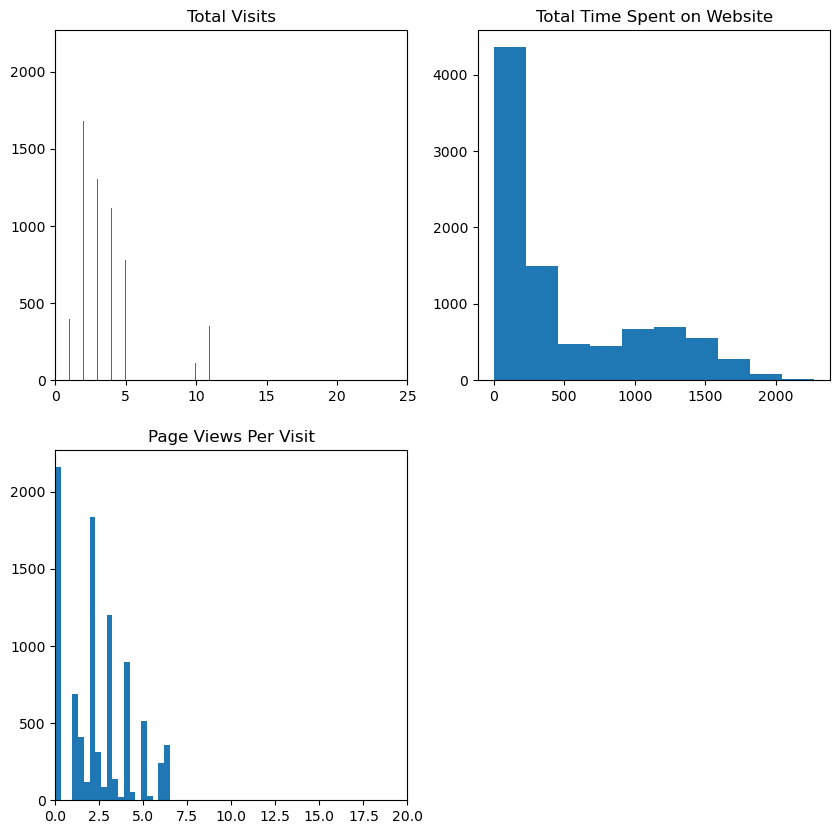

In [28]:
# Analysing Numerical Variabels 

# Bar graph for numerical variables
plt.figure(figsize = (10, 10))
plt.subplot(221)
plt.hist(df_leads['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0, 25)

plt.subplot(222)
plt.hist(df_leads['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(df_leads['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0, 20)

plt.show()

Following insights can be drawn from the plots:

1. Lead Origin: "Landing Page Submission" identified 53% customers, "API" identified 39%.
2. Do Not Email: 92% of the people has opted that they dont want to be emailed about the course.
3. Lead Source: 58% Lead source is from Google & Direct Traffic combined
4. Last Activity: 68% of customers contribution in SMS Sent & Email Opened activities

# Data Analysis - Bivariate Analysis

We will now analyze each of the categorical value alog with converted variable

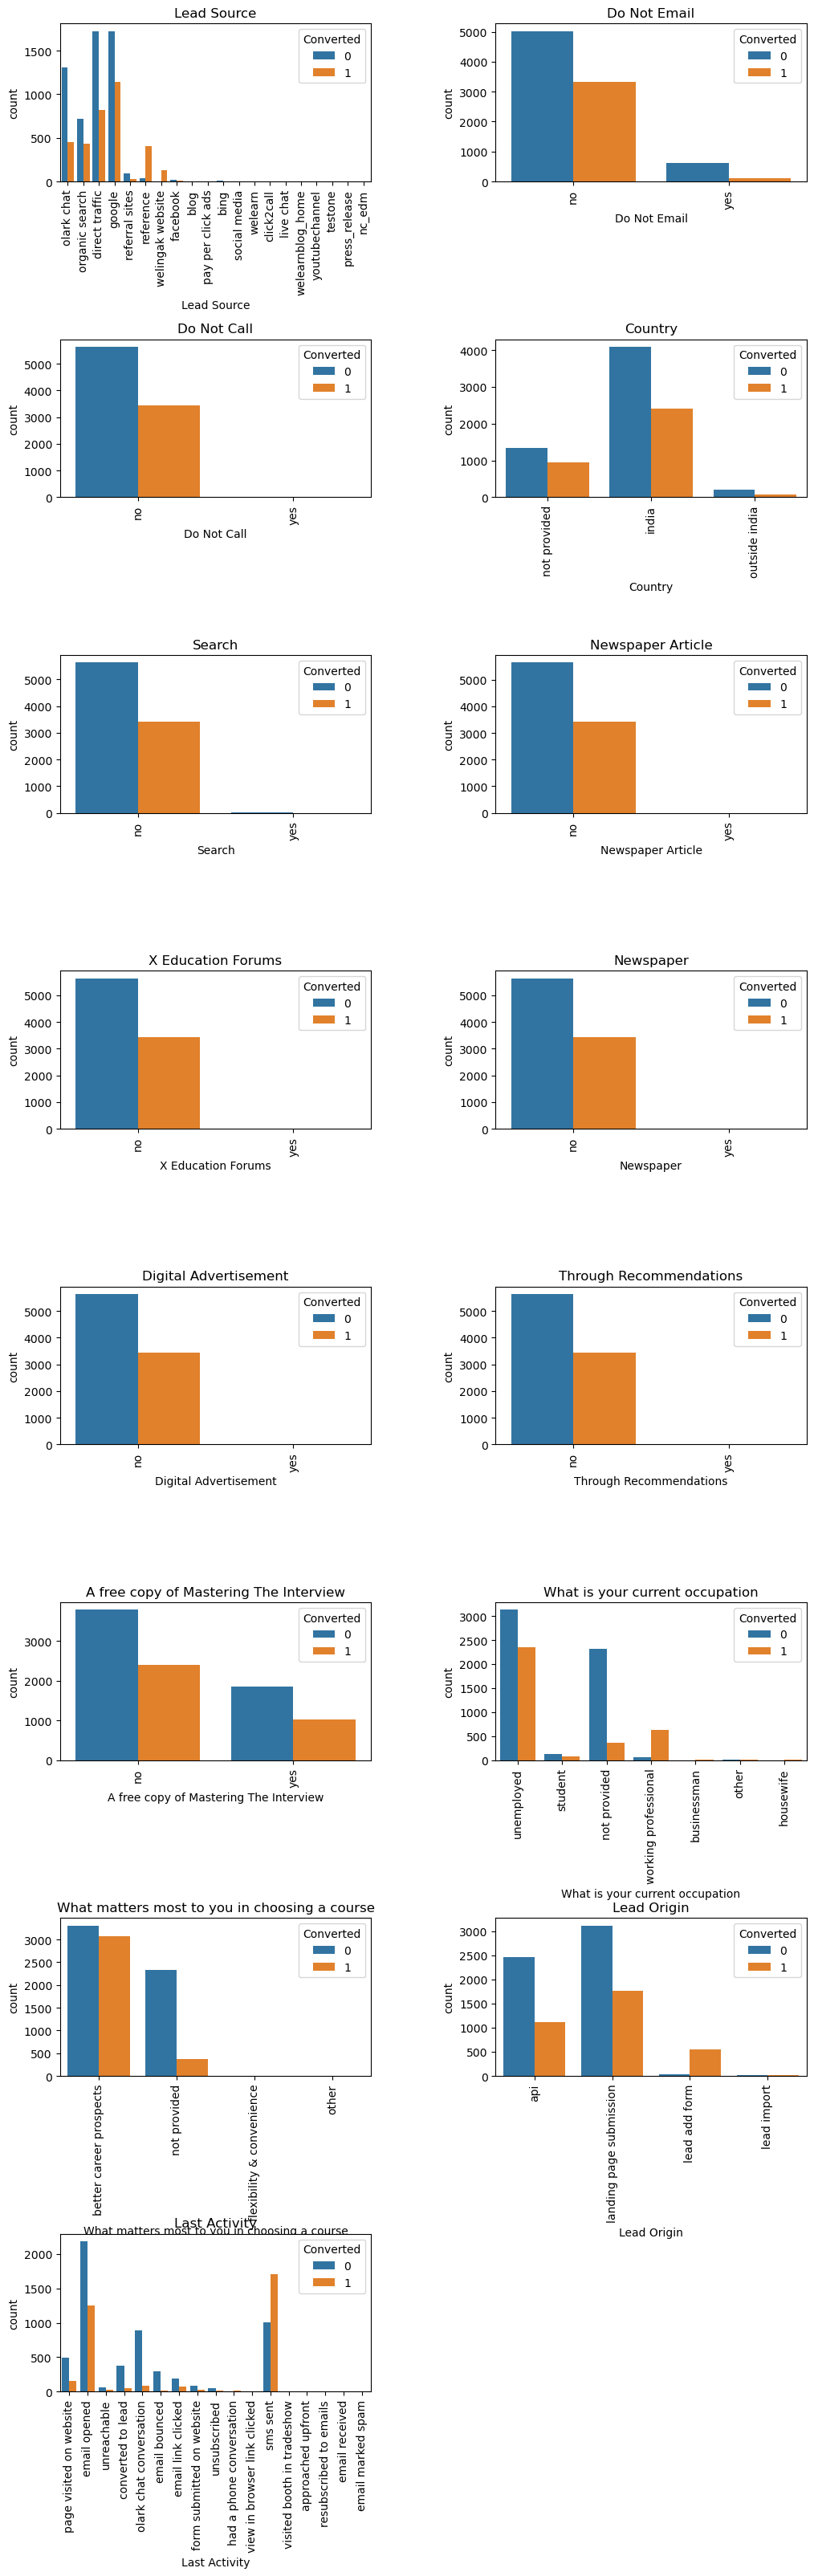

In [29]:
vars_cat = ['Lead Source', 'Do Not Email', 'Do Not Call', 'Country', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview', 'What is your current occupation', 'What matters most to you in choosing a course', 'Lead Origin', 'Last Activity']

plt.figure(figsize = (12, 50))
plt.subplots_adjust(top = 0.6, bottom=0.01, hspace=1, wspace=0.4)

for i in enumerate(vars_cat):
    plt.subplot(8, 2, i[0] + 1)    
    sns.countplot(data = df_leads, x = i[1], hue = 'Converted').tick_params(axis='x', rotation = 90)
    plt.title(i[1])
    
plt.show()

Following insights can be drawn from the plots:

Lead Origin: Around 52% of all leads originated from "Landing Page Submission" with a highest lead conversion rate. The "API" identified approximately 39% of customers with a second highest lead conversion rate


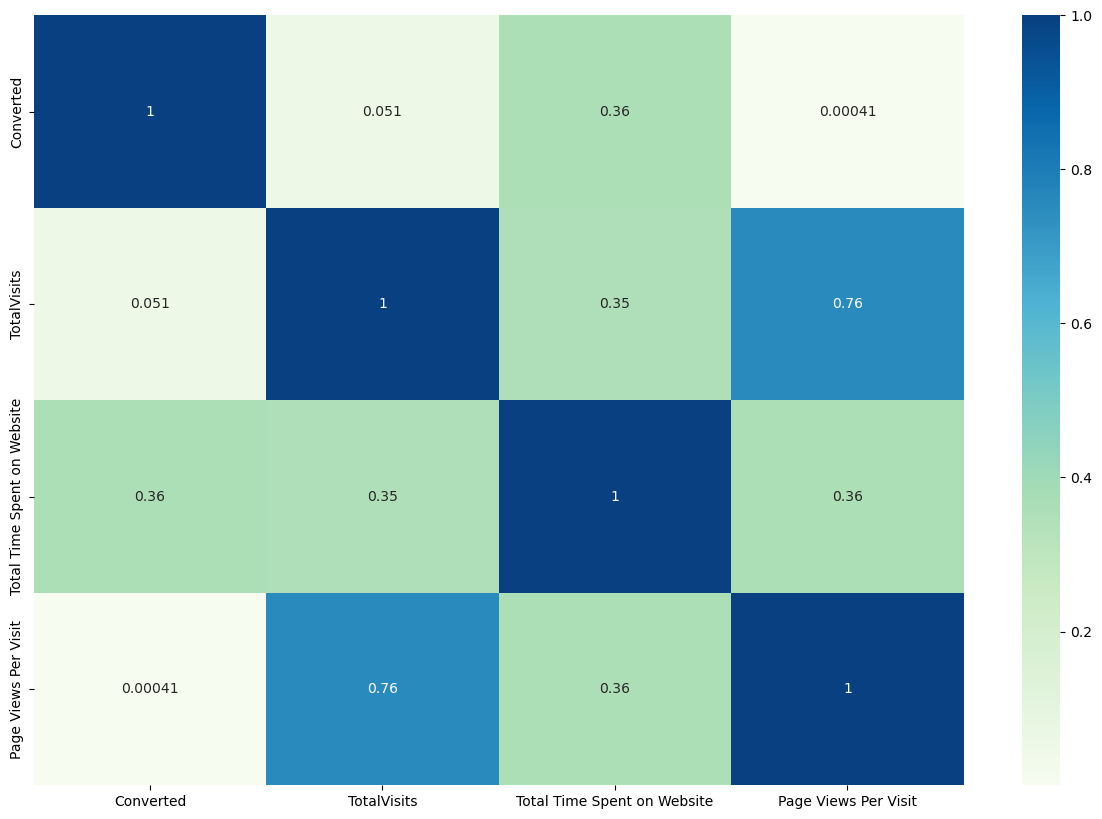

In [30]:
# Checking correlation among the variables. 

plt.figure(figsize = (15, 10))
sns.heatmap(df_leads[['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']].corr(), cmap = 'GnBu', annot = True)
plt.show()

From the correlation Total Time Spent on Website seems to be highly correlated with conversion positively.

# Data Preparation

In [31]:
# Create dummy variables
df_leads = pd.get_dummies(data = df_leads, columns = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview'], drop_first = True)


In [32]:
# Print columns after creating dummies
df_leads.columns

Index(['Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Country',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Lead Origin_landing page submission', 'Lead Origin_lead add form',
       'Lead Origin_lead import', 'Lead Source_blog', 'Lead Source_click2call',
       'Lead Source_direct traffic', 'Lead Source_facebook',
       'Lead Source_google', 'Lead Source_live chat', 'Lead Source_nc_edm',
       'Lead Source_olark chat', 'Lead Source_organic search',
       'Lead Source_pay per click ads', 'Lead Source_press_release',
       'Lead Source_reference', 'Lead Source_referral sites',
       'Lead Source_social media', 'Lead Source_testone',
       'Lead Source_welearn', 'Lead Source_welearnblog_home',
       'Lead Source_welingak website', 'Lead Source_youtubechannel',
       'Do Not

In [33]:
# Print few rows to inspect
df_leads.head()

,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,...,Last Activity_unsubscribed,Last Activity_view in browser link clicked,Last Activity_visited booth in tradeshow,What is your current occupation_housewife,What is your current occupation_not provided,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,A free copy of Mastering The Interview_yes
0,no,0,0.0,0,0.0,not provided,better career prospects,no,no,no,...,0,0,0,0,0,0,0,1,0,0
1,no,0,5.0,674,2.5,india,better career prospects,no,no,no,...,0,0,0,0,0,0,0,1,0,0
2,no,1,2.0,1532,2.0,india,better career prospects,no,no,no,...,0,0,0,0,0,0,1,0,0,1
3,no,0,1.0,305,1.0,india,better career prospects,no,no,no,...,0,0,0,0,0,0,0,1,0,0
4,no,1,2.0,1428,1.0,india,better career prospects,no,no,no,...,0,0,0,0,0,0,0,1,0,0


In [34]:
df_leads.drop(['What is your current occupation_not provided', 'Do Not Call', 'Country', 'What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations'], 1, inplace = True)
df_leads

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,...,Last Activity_unreachable,Last Activity_unsubscribed,Last Activity_view in browser link clicked,Last Activity_visited booth in tradeshow,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,A free copy of Mastering The Interview_yes
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,2.0,1532,2.00,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,0,1.0,305,1.00,1,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
9237,0,2.0,199,2.00,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
9238,1,3.0,499,3.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model Building

In [35]:
# Split Data into training and test

# Checking shape before splitting
df_leads.shape

(9074, 49)

In [36]:
# y to contain only target variable
y = df_leads.pop('Converted')

# X is all remaining variables also our independent variables
X = df_leads

# Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [37]:
# Inspect independent variables
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,...,Last Activity_unreachable,Last Activity_unsubscribed,Last Activity_view in browser link clicked,Last Activity_visited booth in tradeshow,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,A free copy of Mastering The Interview_yes
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2.0,1532,2.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,1.0,305,1.0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [38]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(6351, 48)
(2723, 48)


In [39]:
num_vars = ['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [40]:
#Inspect stats from Training set after scaling
X_train.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,...,Last Activity_unreachable,Last Activity_unsubscribed,Last Activity_view in browser link clicked,Last Activity_visited booth in tradeshow,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,A free copy of Mastering The Interview_yes
count,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,...,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000
mean,0.294857,0.216432,0.350925,0.539758,0.063769,0.003621,0.000157,0.000315,0.280901,0.003621,...,0.008975,0.005668,0.000472,0.000157,0.001102,0.002047,0.024091,0.609038,0.070855,0.317115
std,0.262077,0.242568,0.279336,0.498456,0.244361,0.060074,0.012548,0.017744,0.449474,0.060074,...,0.094318,0.075081,0.021731,0.012548,0.033184,0.045200,0.153343,0.488004,0.256603,0.465389
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.090909,0.006436,0.153846,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.272727,0.110963,0.307692,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.454545,0.411229,0.461538,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
pd.options.display.max_columns = None
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,Lead Source_live chat,Lead Source_nc_edm,Lead Source_olark chat,Lead Source_organic search,Lead Source_pay per click ads,Lead Source_press_release,Lead Source_reference,Lead Source_referral sites,Lead Source_social media,Lead Source_testone,Lead Source_welearn,Lead Source_welearnblog_home,Lead Source_welingak website,Lead Source_youtubechannel,Do Not Email_yes,Last Activity_converted to lead,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email marked spam,Last Activity_email opened,Last Activity_email received,Last Activity_form submitted on website,Last Activity_had a phone conversation,Last Activity_olark chat conversation,Last Activity_page visited on website,Last Activity_resubscribed to emails,Last Activity_sms sent,Last Activity_unreachable,Last Activity_unsubscribed,Last Activity_view in browser link clicked,Last Activity_visited booth in tradeshow,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,A free copy of Mastering The Interview_yes


Build a Model using RFE and Automated approach: Use RFE to eliminate some columns

In [42]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LogisticRegression()

# Running RFE with 15 variables as output
rfe = RFE(lr, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [43]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 5),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 6),
 ('Lead Origin_landing page submission', False, 18),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 32),
 ('Lead Source_blog', False, 23),
 ('Lead Source_click2call', False, 14),
 ('Lead Source_direct traffic', True, 1),
 ('Lead Source_facebook', False, 31),
 ('Lead Source_google', False, 3),
 ('Lead Source_live chat', False, 25),
 ('Lead Source_nc_edm', False, 13),
 ('Lead Source_olark chat', False, 11),
 ('Lead Source_organic search', False, 2),
 ('Lead Source_pay per click ads', False, 21),
 ('Lead Source_press_release', False, 34),
 ('Lead Source_reference', False, 9),
 ('Lead Source_referral sites', True, 1),
 ('Lead Source_social media', False, 15),
 ('Lead Source_testone', False, 22),
 ('Lead Source_welearn', False, 20),
 ('Lead Source_welearnblog_home', False, 27),
 ('Lead Source_welingak website', True, 1),
 ('Lead Source_youtubechannel', Fa

In [44]:
# columns which are selected by RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_lead add form',
       'Lead Source_direct traffic', 'Lead Source_referral sites',
       'Lead Source_welingak website', 'Do Not Email_yes',
       'Last Activity_converted to lead',
       'Last Activity_had a phone conversation',
       'Last Activity_olark chat conversation', 'Last Activity_sms sent',
       'What is your current occupation_housewife',
       'What is your current occupation_other',
       'What is your current occupation_student',
       'What is your current occupation_unemployed',
       'What is your current occupation_working professional'],
      dtype='object')

In [45]:
# columns which are not selected by RFE
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_landing page submission', 'Lead Origin_lead import',
       'Lead Source_blog', 'Lead Source_click2call', 'Lead Source_facebook',
       'Lead Source_google', 'Lead Source_live chat', 'Lead Source_nc_edm',
       'Lead Source_olark chat', 'Lead Source_organic search',
       'Lead Source_pay per click ads', 'Lead Source_press_release',
       'Lead Source_reference', 'Lead Source_social media',
       'Lead Source_testone', 'Lead Source_welearn',
       'Lead Source_welearnblog_home', 'Lead Source_youtubechannel',
       'Last Activity_email bounced', 'Last Activity_email link clicked',
       'Last Activity_email marked spam', 'Last Activity_email opened',
       'Last Activity_email received',
       'Last Activity_form submitted on website',
       'Last Activity_page visited on website',
       'Last Activity_resubscribed to emails', 'Last Activity_unreachable',
       'Last Activity_unsubscribed',
       'Last Activ

In [46]:
# Function to calculate VIFs and print them - Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    print(vif.sort_values(by = 'VIF', ascending = False))

In [49]:
# Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    
    lm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit() 
    
    print(lm.params)
    print(lm.summary())
    return lm

### Model 1 - Start with all variables selected by RFE

In [50]:
# Selected columns for Model 1 - all columns selected by RFE

build_model(rfe_col)
get_vif(rfe_col)

const                                                   -2.721483
Total Time Spent on Website                              3.853391
Lead Origin_lead add form                                2.863419
Lead Source_direct traffic                              -0.581309
Lead Source_referral sites                              -0.551398
Lead Source_welingak website                             2.735867
Do Not Email_yes                                        -1.566591
Last Activity_converted to lead                         -1.309802
Last Activity_had a phone conversation                   1.561080
Last Activity_olark chat conversation                   -0.802561
Last Activity_sms sent                                   1.228911
What is your current occupation_housewife               23.884623
What is your current occupation_other                    2.078039
What is your current occupation_student                  1.443676
What is your current occupation_unemployed               1.198918
What is yo

"Current_occupation_Housewife" column will be removed from model due to high p-value of 0.999, which is above the accepted threshold of 0.05 for statistical significance.

### Model 2 - Dropping the variable "What is your current occupation_housewife"

In [54]:
# Dropping 'What is your current occupation_housewife' column
rfe_col = rfe_col.drop("What is your current occupation_housewife")

build_model(rfe_col)
get_vif(rfe_col)

const                                                  -2.688376
Total Time Spent on Website                             3.853843
Lead Origin_lead add form                               2.899019
Lead Source_direct traffic                             -0.581467
Lead Source_referral sites                             -0.557024
Lead Source_welingak website                            2.701765
Do Not Email_yes                                       -1.571537
Last Activity_converted to lead                        -1.318154
Last Activity_had a phone conversation                  1.552148
Last Activity_olark chat conversation                  -0.813819
Last Activity_sms sent                                  1.218390
What is your current occupation_other                   2.046650
What is your current occupation_student                 1.412424
What is your current occupation_unemployed              1.169323
What is your current occupation_working professional    3.732446
dtype: float64
          

 "Lead Source_referral sites" column will be removed from model due to high p-value of  0.081, which is above the accepted threshold of 0.05 for statistical significance.

### Model 3 - Dropping the variable "Lead Source_referral sites"

In [76]:
# Dropping 'Lead Source_referral sites' column
#rfe_col = rfe_col.drop("Lead Source_referral sites")

lm = build_model(rfe_col)
get_vif(rfe_col)

const                                                  -2.698791
Total Time Spent on Website                             3.849563
Lead Origin_lead add form                               2.908209
Lead Source_direct traffic                             -0.571328
Lead Source_welingak website                            2.701723
Do Not Email_yes                                       -1.568761
Last Activity_converted to lead                        -1.318484
Last Activity_had a phone conversation                  1.544488
Last Activity_olark chat conversation                  -0.820835
Last Activity_sms sent                                  1.224084
What is your current occupation_other                   2.053545
What is your current occupation_student                 1.419886
What is your current occupation_unemployed              1.168326
What is your current occupation_working professional    3.729244
dtype: float64
                 Generalized Linear Model Regression Results               

Model 3 is stable and has significant p-values within the threshold (p-values < 0.05)

No variable needs to be dropped as they all have good VIF values less than 5

So we will final our Model 3 for Model Evaluation

In [71]:
# Build a model with all columns to select features automatically

#Build a model with final columns
X_train_sm = sm.add_constant(X_train[rfe_col])

lr.fit(X_train_sm, y_train)

print(lr.intercept_, lr.coef_)

[-2.62344538] [[-0.00416374  3.74900139  2.84427626 -0.56052752  1.70442939 -1.50818295
  -1.26094954  1.10009719 -0.81222559  1.20833758  1.45943602  1.31152402
   1.12490345  3.55204533]]


# Making Predictions

In [78]:
# Predicting the probabilities on the train set

y_train_pred = lm.predict(X_train_sm)
y_train_pred

1943    0.579998
456     0.031556
6547    0.447783
8836    0.782492
6529    0.967145
          ...   
5850    0.114691
5301    0.207555
5501    0.041281
897     0.105909
7413    0.262454
Length: 6351, dtype: float64

In [79]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.57999813, 0.03155555, 0.44778319, 0.78249171, 0.96714481,
       0.39452343, 0.27351415, 0.62792361, 0.03616972, 0.90448082])

In [80]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.579998
1,0,0.031556
2,0,0.447783
3,0,0.782492
4,1,0.967145


Now we have to find the optimal cutoff Threshold value of Probability. Let's start with default 0.5 value and add a new feature predicted in above dataframe using the probabilities

In [81]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.579998,1
1,0,0.031556,0
2,0,0.447783,0
3,0,0.782492,1
4,1,0.967145,1


# Model Evaluation

In [82]:
# Creating confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3516,  461],
       [ 787, 1587]], dtype=int64)

In [83]:
# Predicted        not_converted  |  converted
# Actual                          |
# -----------------------------------------------------
# not_converted       3516       |   461
# converted           787        |   1587  


# Above is the confusion matrix when we use threshold of probability as 0.5

In [84]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8034955125177138

That's around 80% accuracy seems to be a good value

In [85]:
# Finding sensitivity and specificity when we have Predicted at threshold 0.5 probability 

# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [86]:
# Calculating the sensitivity
TP / (TP + FN)

0.66849199663016

In [87]:
# Calculating the specificity
TN / (TN + FP)

0.8840834800100579

In [88]:
# Calculating false postive rate - predicting conversion when customer does not have converted
FP / (TN + FP)

0.11591651998994217

In [89]:
# Calculating positive predictive value 
TP / (TP + FP)

0.77490234375

In [90]:
# Calculating negative predictive value
TN / (TN + FN)

0.8171043458052522